# Prediction Using Unsupervised ML

By Sneha Prasad

# Problem statement

From the given 'Iris' dataset, predicting the optimum number of clusters and representing it visually.

# Dataset Description

- Id            : ID of the Species
- SepalLengthCm : Length of the Sepal
- SepalWidthCm  : Width of the Sepal
- PetalLengthCm : Length of the Petal
- PetalWidthCm  : Width of the Petal
- Species       : a group of living organisms consisting of similar individuals capable of exchanging genes

# Importing Libraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# Loading Dataset

In [107]:
df=pd.read_csv(r'C:\Users\HP\Downloads\iris (2).csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Exploration

In [108]:
df.shape

(150, 6)

In [109]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [111]:
df.drop('Id', inplace=True, axis=1)

In [112]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [113]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No Null values are present.

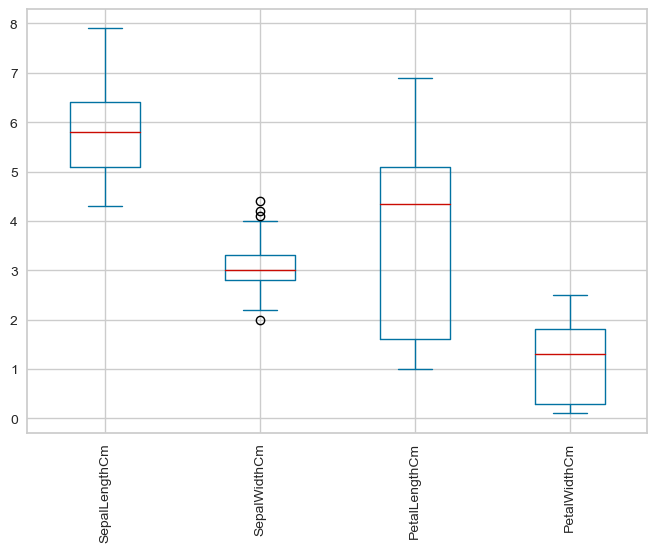

In [114]:
df.plot(kind='box')
plt.xticks(rotation=90)
plt.show()

There are outliers in sepal width cm

# EDA

In [115]:
num=df.select_dtypes(include=np.number)
cat=df.select_dtypes(exclude=np.number)

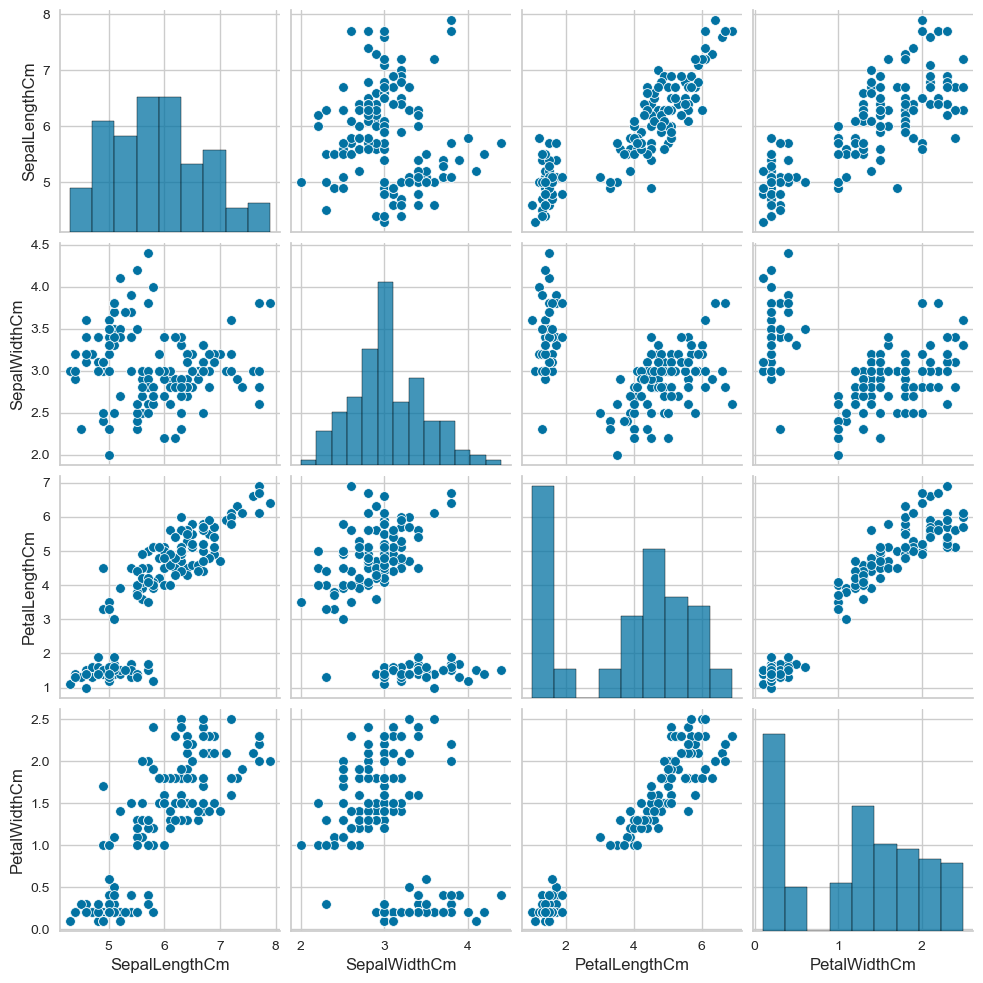

In [116]:
sns.pairplot(df)

- There exists a positive correlation between petalLength and petalWidth.
- A strong positive correlation is observed between petalLength and sepalLength.
- The remaining features exhibit slightly positive correlations with each other.

<Axes: >

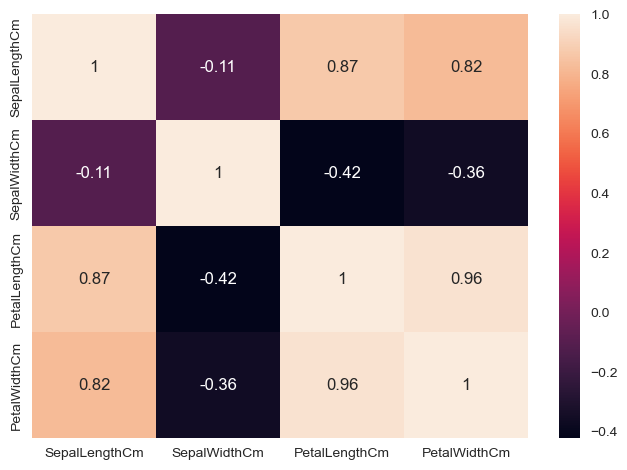

In [117]:
sns.heatmap(num.corr(), annot=True)

- There is presence of multicollinearity
- By examining the heatmap, it becomes apparent that SepalLength exhibits a significant correlation with both PetalWidth and PetalLength.

# Preprocessing

In [118]:
num.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [119]:
sc=StandardScaler()
df_sc=pd.DataFrame(sc.fit_transform(num),columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

In [120]:
df_sc

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


# Building Model

### 1. KMeans clustering

In [121]:
wcss=[]
for i in range(2,7):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_sc)
    wcss.append(kmeans.inertia_)

In [122]:
wcss

[223.73200573676348,
 140.96581663074699,
 114.68221609937967,
 91.19197002146464,
 80.19300510158156]

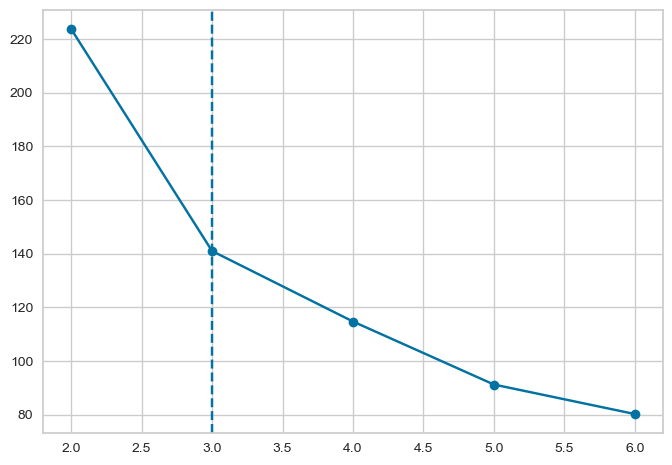

In [123]:
plt.plot(range(2, 7), wcss, marker='o')
plt.axvline(x=3,linestyle='--', label='Your Label Here')
plt.show()

According to the elbow plot, best k value is 3

In [124]:
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(df_sc)

KMeans(n_clusters=3, random_state=0)

In [125]:
sc=[]
for i in range(2,7):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_sc)
    sc.append(silhouette_score(df_sc,kmeans.labels_))

<BarContainer object of 5 artists>

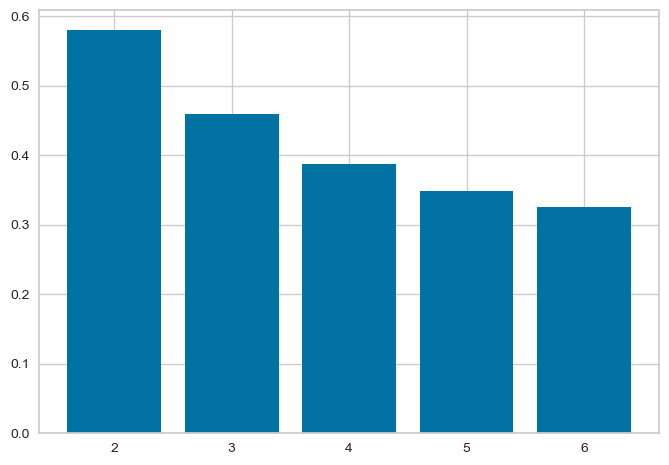

In [126]:
plt.bar(range(2,7),sc)

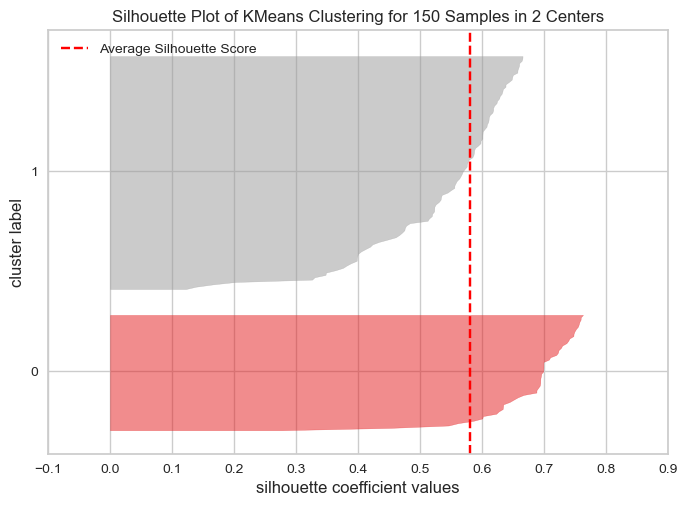

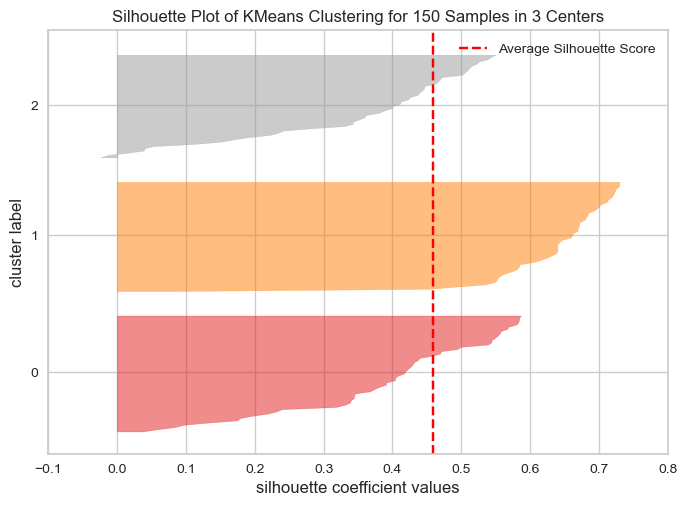

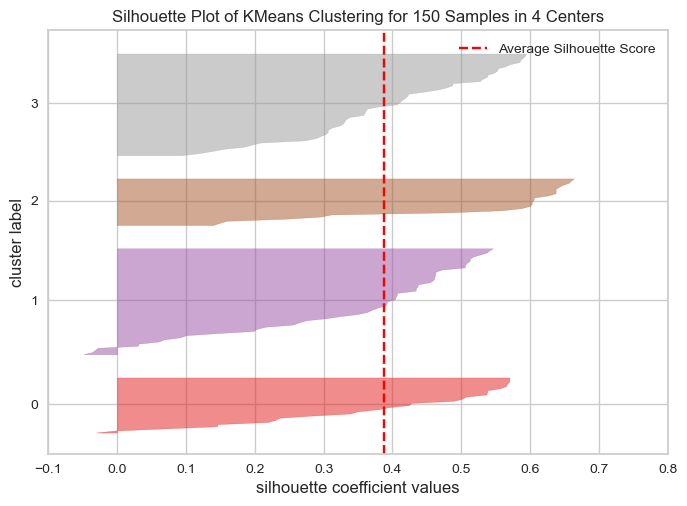

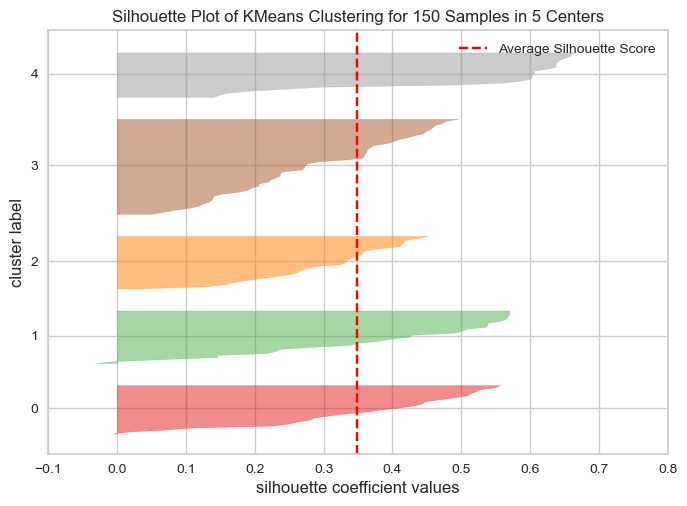

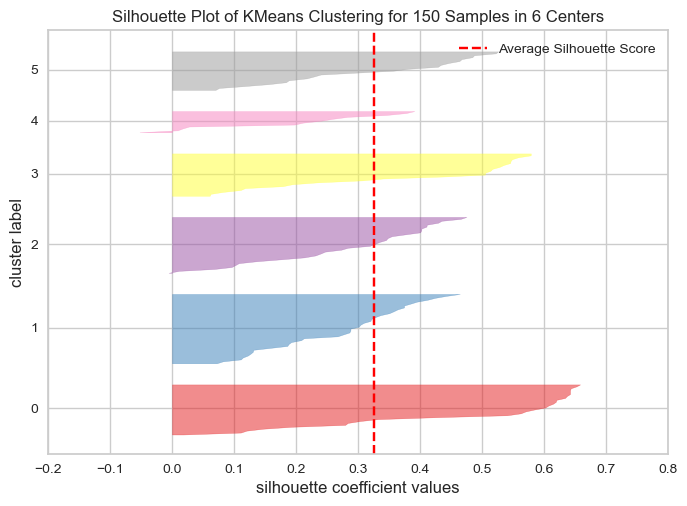

In [127]:
for i in range(2,7):
    model=KMeans(n_clusters=i,random_state=0)
    viz=SilhouetteVisualizer(model)
    viz.fit(df_sc)
    viz.show()

Best value of k after analysing the bar chart and silhoutte visualizer is 2. 

In [128]:
final_model=KMeans(n_clusters=2,random_state=0)
final_model.fit(df_sc)

KMeans(n_clusters=2, random_state=0)

In [129]:
final_model.inertia_

223.73200573676348

In [130]:
final_model.cluster_centers_

array([[-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [ 0.50728948, -0.4211534 ,  0.65243918,  0.62756431]])

In [131]:
final_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [132]:
df['kmean_label']=final_model.labels_

In [133]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,kmean_label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1
146,6.3,2.5,5.0,1.9,Iris-virginica,1
147,6.5,3.0,5.2,2.0,Iris-virginica,1
148,6.2,3.4,5.4,2.3,Iris-virginica,1


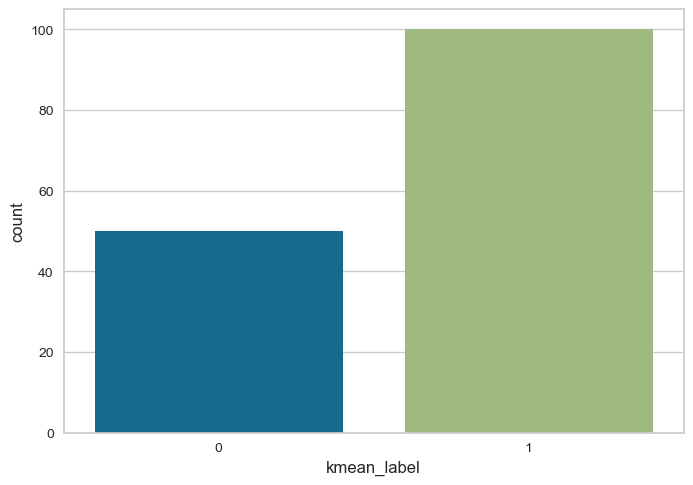

In [134]:
sns.countplot(x=df['kmean_label'])
plt.show()

In [137]:
df[df['kmean_label']==0].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,kmean_label
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,5.00600,3.418000,1.464000,0.24400,0.0
std,0.35249,0.381024,0.173511,0.10721,0.0
min,4.30000,2.300000,1.000000,0.10000,0.0
25%,4.80000,3.125000,1.400000,0.20000,0.0
50%,5.00000,3.400000,1.500000,0.20000,0.0
75%,5.20000,3.675000,1.575000,0.30000,0.0
max,5.80000,4.400000,1.900000,0.60000,0.0


In [138]:
df[df['kmean_label']==1].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,kmean_label
count,100.000000,100.000000,100.000000,100.000000,100.0
mean,6.262000,2.872000,4.906000,1.676000,1.0
std,0.662834,0.332751,0.825578,0.424769,0.0
min,4.900000,2.000000,3.000000,1.000000,1.0
25%,5.800000,2.700000,4.375000,1.300000,1.0
50%,6.300000,2.900000,4.900000,1.600000,1.0
75%,6.700000,3.025000,5.525000,2.000000,1.0
max,7.900000,3.800000,6.900000,2.500000,1.0


# Inference

- Flowers with sepal length around 5cm, sepal width 3cm, petal length 1.6cm and petal width 0.2cm belongs to cluster 0.
- Flowers with sepal length around 6.2cm, sepal width 2.8cm, petal length 4.9cm and petal width 1.6cm belongs to cluster 1.